
The plot below shows the curve:
$f(x) = ax^2+bx-c$

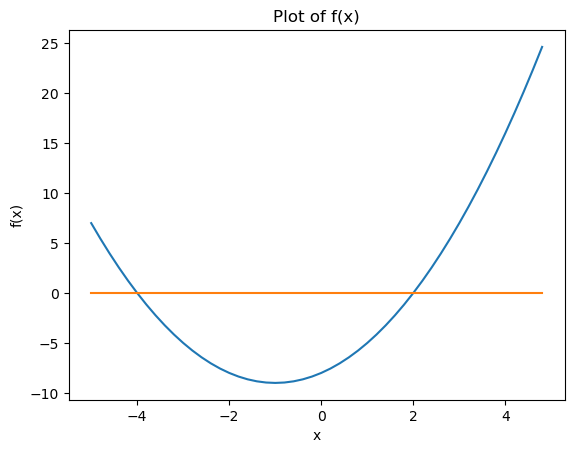

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

a = 1
b = 2
c = -8
f = lambda x:a * x * x + b * x + c

x = np.arange(-5.0, 5.0, 0.2)

plt.title("Plot of f(x)")
plt.plot(x, f(x))
plt.plot(x, 0.0 * x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


The fuction below, *find_roots*, takes in a function, $f$, and two starting points, $x_1$ and $x_3$, and finds a root of $f$ between those two points 

In [93]:
def find_roots(f,x1,x3,tol=0.0001,test = False):

    x2 = (x1+x3)/2
    iter = 0

    #Check if f(x1) or f(x3) are 0
    if (f(x1) == 0):
        return x1
    elif (f(x3) == 0):
        return x3
    #Check if f(x1) & f(x3) are below-above 0
    if (f(x1)>0 or f(x3)<0):
        return np.nan
    
    while (math.fabs(f(x2)) > tol):

        x2 = (x1+x3)/2
        iter+=1

        if(f(x2) > 0):
            x3 = x2
        elif(f(x2) < 0):
            x1 = x2
        
        
    if test == True:  
        return iter
    else:
        return x2
    

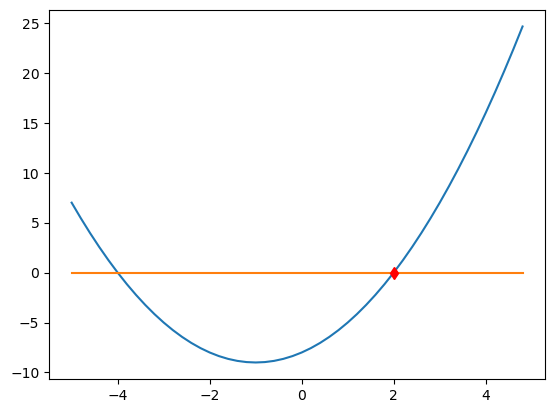

f(2.000008) = 0


In [ ]:
root = find_roots(f,0,5)


plt.plot(x, f(x))
plt.plot(x, 0.0 * x)
plt.plot(root, f(root), "rd")
plt.show()
print("f(%f) = 0" % root )

To see how the tolerance of error in our answer affects runtime, iteriations can be plotted against the logarithim of tolerance. 

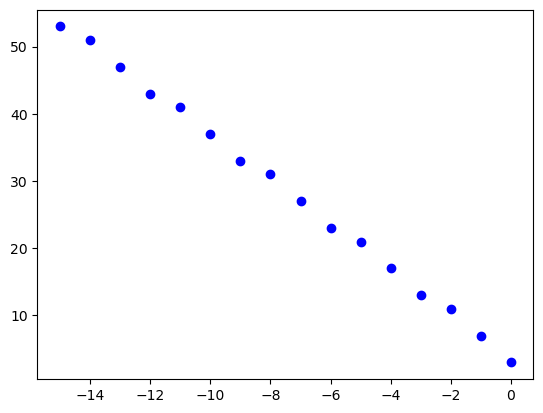

In [114]:
tol = np.logspace(-15,0,16)
iter = [find_roots(f,0,5,t,True) for t in tol]
plt.plot([math.log10(t) for t in tol],iter,"bo")
plt.show()